In [25]:
import tensorflow as tf                             # Importa TensorFlow y sus submódulos necesarios
from tensorflow.keras.datasets import mnist         # Importa el conjunto de datos MNIST
from tensorflow.keras.models import Sequential      # Importa el modelo secuencial
from tensorflow.keras.layers import Dense, Flatten  # Importa las capas Dense y Flatten
import matplotlib.pyplot as plt                     # Importa matplotlib para visualización
import numpy as np                                  # Importa NumPy para operaciones numéricas


# Define una función de activación personalizada que utiliza la función softmax.
def softmax_v2(x):
    return tf.nn.softmax(x)

# Carga y preprocesa los datos del conjunto de datos MNIST.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normaliza los datos de entrenamiento y prueba dividiéndolos por 255.0.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define el modelo secuencial.
model = Sequential([
    # Aplana las imágenes de 28x28 píxeles a un vector de 784 elementos.
    Flatten(input_shape=(28, 28)),
    # Capa densa con 128 unidades y función de activación ReLU.
    Dense(128, activation='relu'),
    # Otra capa densa con 128 unidades y función de activación ReLU.
    Dense(128, activation='relu'),
    # Capa de salida con 10 unidades (correspondientes a las 10 clases de dígitos) y la función de activación personalizada softmax.
    Dense(10, activation=softmax_v2)
])

# Compila el modelo especificando el optimizador, la función de pérdida y las métricas de evaluación.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo con los datos de entrenamiento durante 3 épocas.
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 739us/step - accuracy: 0.8824 - loss: 0.4082
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.9696 - loss: 0.0975
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.9786 - loss: 0.0670


In [26]:
# Evalúa el modelo con los datos de prueba para obtener la pérdida y la precisión.
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)  # Muestra la pérdida del modelo.
print(val_acc)  # Muestra la precisión del modelo.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.9726 - loss: 0.0898
0.07370708882808685
0.9768999814987183


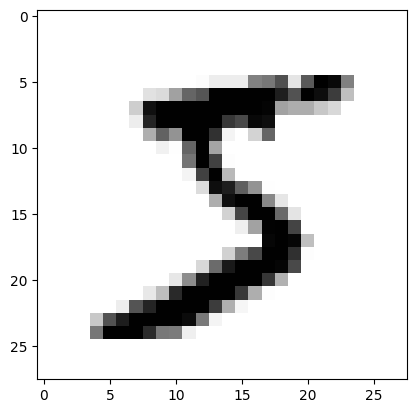

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [27]:
import matplotlib.pyplot as plt

# Muestra la primera imagen del conjunto de entrenamiento.
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
print(x_train[0])  # Muestra los valores de los píxeles de la imagen.

In [28]:
# Guarda el modelo utilizando la extensión .keras.
model.save('epic_num_reader.keras')

In [29]:
# Carga el modelo guardado, especificando la función de activación personalizada en custom_objects.
custom_objects = {'softmax_v2': softmax_v2}
new_model = tf.keras.models.load_model('epic_num_reader.keras', custom_objects=custom_objects)

In [30]:
# Realiza predicciones con el modelo cargado utilizando los datos de prueba.
predictions = new_model.predict(x_test)
print(predictions)  # Muestra las predicciones para el primer lote de datos de prueba.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
[[8.01222626e-08 4.50565267e-06 3.95985035e-06 ... 9.99971390e-01
  2.68668919e-06 3.09190909e-06]
 [2.87208723e-09 1.23177146e-04 9.99875426e-01 ... 5.05336963e-08
  4.88301907e-07 1.58873765e-11]
 [7.56770589e-07 9.99256551e-01 1.59834162e-04 ... 3.06524569e-04
  1.24477781e-04 4.59949979e-06]
 ...
 [1.43450512e-11 1.37397138e-09 1.06400076e-10 ... 2.77799177e-06
  7.14894881e-08 1.34763277e-05]
 [2.06349799e-08 1.83518641e-05 4.32857270e-08 ... 1.23932736e-07
  5.79494284e-03 7.01176148e-08]
 [2.36962023e-07 2.12869479e-11 8.86682994e-09 ... 1.57601981e-12
  1.22540996e-07 8.99274266e-10]]


In [31]:
import numpy as np

# Muestra la clase predicha para la primera imagen del conjunto de prueba.
print(np.argmax(predictions[0]))

7


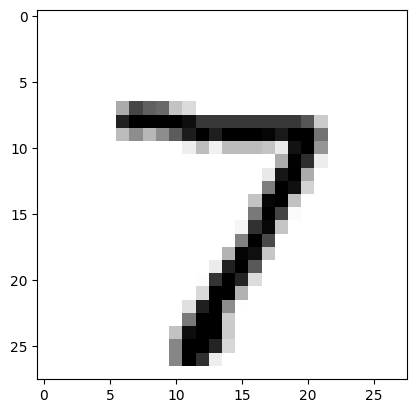

In [32]:
# Muestra la primera imagen del conjunto de prueba.
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()